In [258]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import CubicHermiteSpline
from numpy.linalg import solve
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Orly de Jesus Rivera Cruz
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

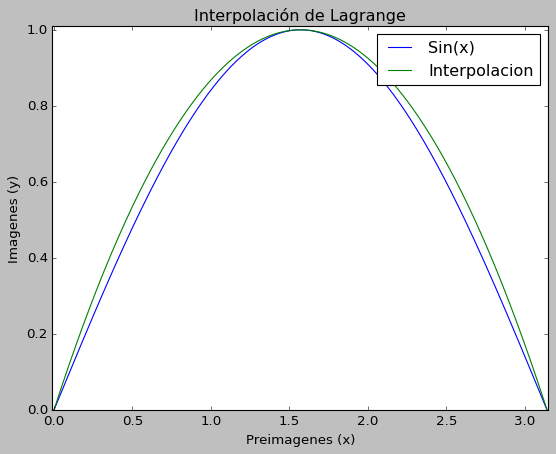

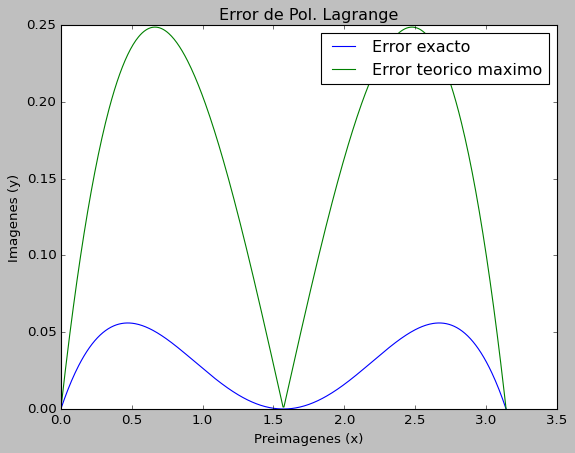

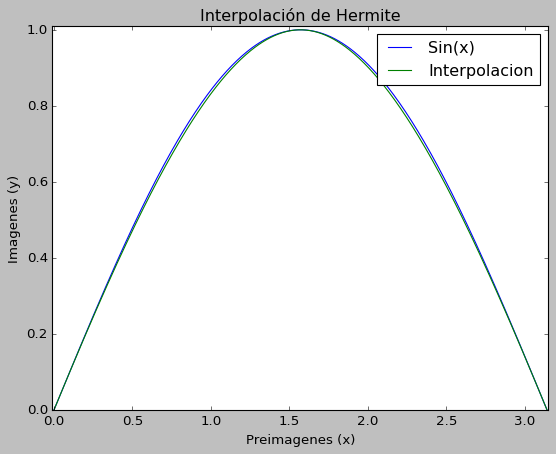

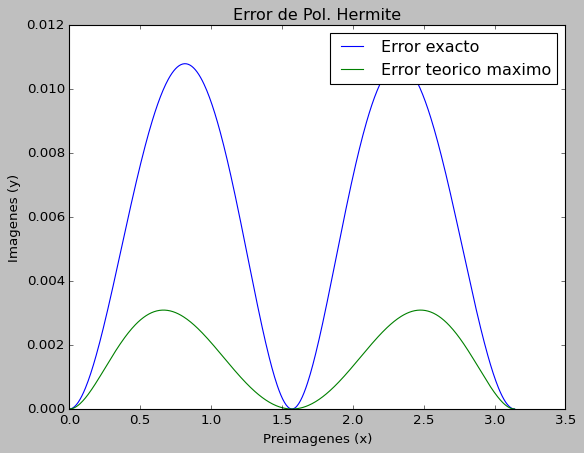

In [287]:
Coords_x = np.array((0 , np.pi /2 , np.pi))
Pendi_x = np.array((1 , 0 , -1))
Coords_y = np.array((0 , 1 , 0))
Conti_x = np.linspace(0 , np.pi , 500)

#-----------------------------------------

Polinomio_Lagrange = lagrange(Coords_x , Coords_y)

#-----------------------------------

plt.style.use("classic")

plt.title("Interpolación de Lagrange")

plt.xlabel("Preimagenes (x)")
plt.ylabel("Imagenes (y)")

plt.xlim(-0.01 , 3.15)
plt.ylim(0 , 1.01)

plt.plot( Conti_x , np.sin(Conti_x) , label = "Sin(x)")
plt.plot( Conti_x , Polinomio_Lagrange(Conti_x) , label = "Interpolacion")

plt.legend()
plt.show()

#--------------------

def ErrorL (x):
    return abs((x)*(x-(np.pi/2))*(x-np.pi)*(1/6)) #La derivada esta acotada por 1 por ser -cosx

#--------------------

plt.title("Error de Pol. Lagrange")

plt.xlabel("Preimagenes (x)")
plt.ylabel("Imagenes (y)")

plt.plot( Conti_x , abs(np.sin(Conti_x) - Polinomio_Lagrange(Conti_x)) , label = "Error exacto")
plt.plot( Conti_x , ErrorL(Conti_x) , label = "Error teorico maximo")
plt.legend()
plt.show()

#----------

def PoHe( x , dx , y ):
    xs = sp.symbols("x")
    Po = 0
    for i in range(0,len(x)):
        h = 1
        for j in range(0,len(x)):
            if i == j:
                continue
            h *= ( xs - x[j])/(x[i] - x[j])
        dh = sp.lambdify(xs , sp.diff(h,xs) )
        h_2 = h**2
        Po += ( (h_2)*(1 - 2*(xs - x[i])*(dh(x[i])))*(y[i]) ) + ( (h_2)*(xs-x[i])*(dx[i]) )
    Po_n = sp.lambdify( "x" , Po)
    return Po_n

Polinomio_Hermite = CubicHermiteSpline(Coords_x , Coords_y , Pendi_x)

#----------

plt.title("Interpolación de Hermite")

plt.xlabel("Preimagenes (x)")
plt.ylabel("Imagenes (y)")

plt.xlim(-0.01 , 3.15)
plt.ylim(0 , 1.01)

plt.plot( Conti_x , np.sin(Conti_x) , label = "Sin(x)")
plt.plot( Conti_x , Polinomio_Hermite(Conti_x) , label = "Interpolacion")

plt.legend()
plt.show()

#--------------------

def ErrorH (x):
    return abs(( x**2 )*( (x-(np.pi/2))**2 )*( (x-np.pi)**2 )*(1/720)) #La derivada esta acotada por 1 por ser cosx

#--------------------

plt.title("Error de Pol. Hermite")

plt.xlabel("Preimagenes (x)")
plt.ylabel("Imagenes (y)")

plt.plot( Conti_x , abs(np.sin(Conti_x) - Polinomio_Hermite(Conti_x)) , label = "Error exacto")
plt.plot( Conti_x , ErrorH(Conti_x) , label = "Error teorico maximo")
plt.legend()
plt.show()



# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

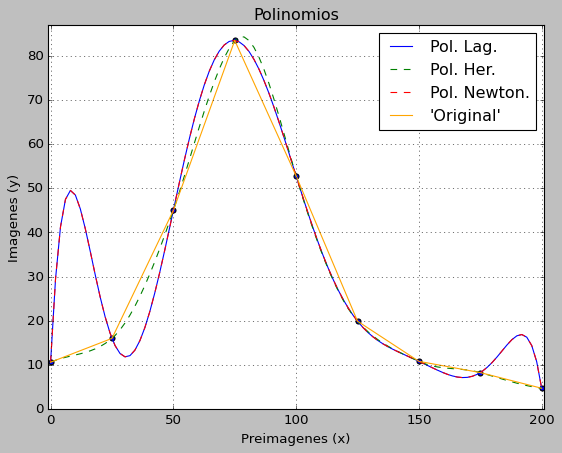

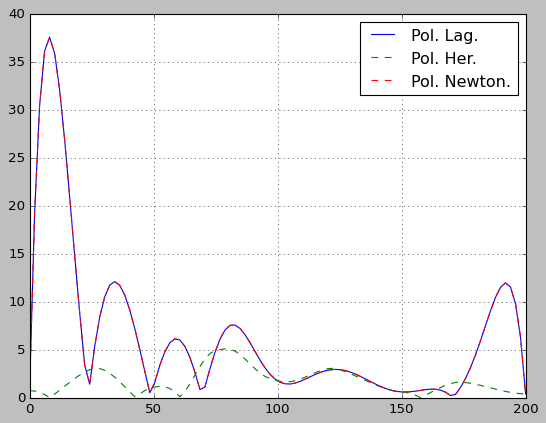

Observamos como el polinomio de hermite le gana abismalmente al de lagrange y newton que se comportan parecido


In [288]:
Er = 78
Gamma = 55
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
Sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])


Sigma0 = Sigma_exp *  ( ((Energia - Er)**2) + ( (Gamma**2) / 4) ) 
PSigma0 = np.mean(Sigma0)

Conti_x = np.linspace(0,200,100)

#--------------------------------

Er_s , Gamma_s , Energia_s , Sigma0_s = sp.symbols(r"E_r , \Gamma , E , \sigma_0")

Sigma_s = (Sigma0_s) / ((Energia_s - Er_s)**2 + (Gamma_s**2 / 4))
dSigma_s = sp.diff( Sigma_s , Energia_s)

Sigma = sp.lambdify( (Er_s , Gamma_s , Energia_s , Sigma0_s) , Sigma_s )
dSigma = sp.lambdify( (Er_s , Gamma_s , Energia_s , Sigma0_s) , dSigma_s )


#------------------------------

Polinomio_Lagrange = lagrange(Energia , Sigma_exp)

Polinomio_Hermite = CubicHermiteSpline(Energia, Sigma_exp , dSigma(Er , Gamma , Energia , Sigma0) )

#------------------------------

def newton( x, y , a = [] ):
    sx = sp.symbols("X")
    if len(x) == len(y):
        a.append(float(y[0]))
    Num = []
    for n in range( 1 , len(y) ):
        dif = (y[n] - y[0]) / (x[n] - x[0])
        Num.append(dif)
    a.append(Num[0])
    if len(Num) != 1:
        return newton(x , Num)
    if len(Num) == 1:
        Pol = 0
        for i in range( len(a) - 1 , 0 , -1):
            Pol += a[i]
            Pol *= (sx - x[i-1])
        Pol += a[0]
        return sp.lambdify( sx , Pol )

Polinomio_Newton = newton(Energia , Sigma_exp)
#------------------------------

plt.style.use("classic")

plt.title("Polinomios")

plt.xlabel("Preimagenes (x)")
plt.ylabel("Imagenes (y)")

plt.xlim(-1 , 201)
plt.ylim(0,87)

plt.scatter(Energia , Sigma_exp)

plt.plot( Conti_x , Polinomio_Lagrange(Conti_x) , label = "Pol. Lag." , ls="-")
plt.plot( Conti_x , Polinomio_Hermite(Conti_x) , label = "Pol. Her." , ls="--")
plt.plot( Conti_x , Polinomio_Newton(Conti_x) , label = "Pol. Newton." , ls="--")
plt.plot( Energia , Sigma_exp , label = "'Original'" , color="orange")

plt.grid()
plt.legend()
plt.show()

#------------------------------
Original = Sigma(Er , Gamma , Conti_x , PSigma0)

plt.plot( Conti_x , abs(Original - Polinomio_Lagrange(Conti_x)) , label = "Pol. Lag." , ls="-" )
plt.plot( Conti_x , abs(Original - Polinomio_Hermite(Conti_x)) , label = "Pol. Her." , ls="--")
plt.plot( Conti_x , abs(Original - Polinomio_Newton(Conti_x)) , label = "Pol. Newton." , ls="--")

plt.grid()
plt.legend()
plt.show()

print("Observamos como el polinomio de hermite le gana abismalmente al de lagrange y newton que se comportan parecido")

# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

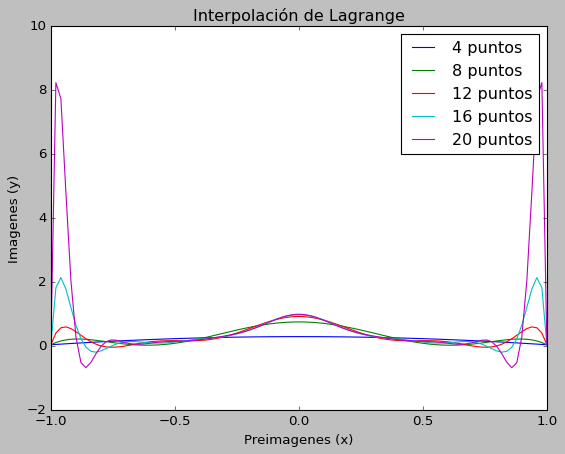

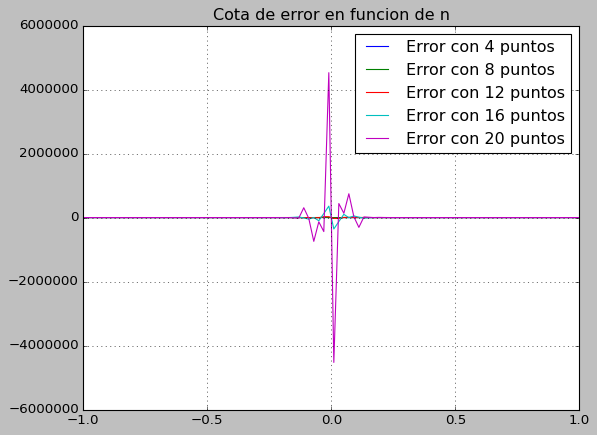

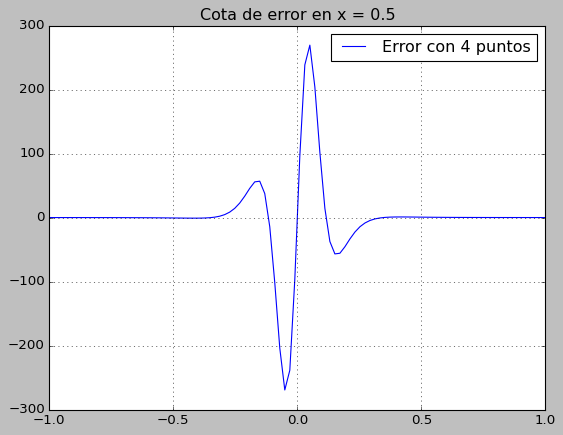

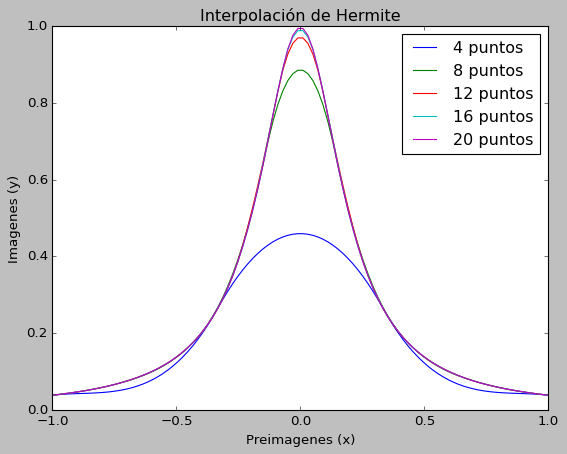

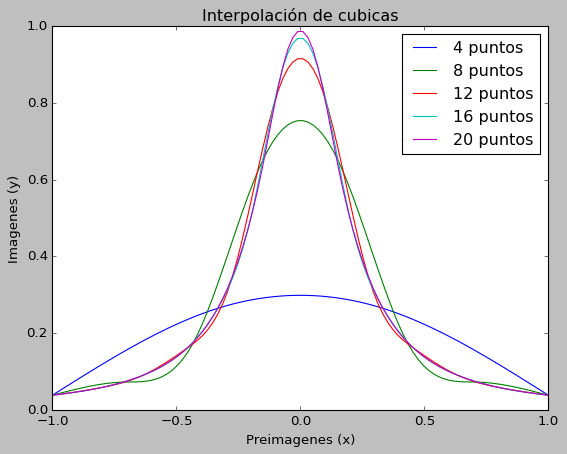

Concluimos que la mejor interpolacion en este caso es la de hermite ya que tiende
 muy rapido y no se vuelve loco mientras mas se aumenten los puntos como pasa con el
 polinomio de lagrange que su error aumenta mientras mas aumentan sus puntos y aunque
cubicsplines tambien sea bueno le gana hermite por su convergencia veloz.


In [299]:
Inter = np.linspace(-1,1,100)

plt.title("Interpolación de Lagrange")

plt.xlabel("Preimagenes (x)")
plt.ylabel("Imagenes (y)")

xs = sp.symbols("x")

for n in [4,8,12,16,20]:
    Coords_x = np.linspace(-1,1,n)
    f = lambda x: 1 / (1 + ((25)*(x**2)))
    PolLagr = lagrange(Coords_x , f(Coords_x))
    plt.plot( Inter , PolLagr(Inter) , label = f"{n} puntos")
plt.legend()
plt.show()

#--------------

for n in [4,8,12,16,20]:
    Coords_x = np.linspace(-1,1,n)
    f = (1) / (1 + 25*(xs**2))
    f_prime= sp.diff (f , xs , n+1)
    Error = f_prime / sp.factorial(n+1)
    for i in Coords_x:
        Error *= ( xs - i )
    Errorc = sp.lambdify(xs,Error)
    plt.plot(Inter , Errorc(Inter) ,label = f"Error con {n} puntos" )
plt.title("Cota de error en funcion de n")
plt.grid()
plt.legend()
plt.show()

#VEMOS QUE EL ERROR SUBE DEMASIADO MIENTRAS N AUMENTA

#--------------

Coords_x = np.linspace(-1,1,4)
f = (1) / (1 + 25*(xs**2))
f_prime= sp.diff (f , xs , 5)
Error = f_prime / sp.factorial(5)
for i in Coords_x:
    Error *= ( 0.5 - i )
Errorc = sp.lambdify(xs,Error)
plt.plot(Inter , Errorc(Inter) ,label = f"Error con 4 puntos" )
plt.title("Cota de error en x = 0.5")
plt.grid()
plt.legend()
plt.show()

#--------------

plt.title("Interpolación de Hermite")
plt.xlabel("Preimagenes (x)")
plt.ylabel("Imagenes (y)")

for n in [4,8,12,16,20]:
    Coords_x = np.linspace(-1,1,n)
    f = lambda x: 1 / (1 + ((25)*(x**2)))
    df = lambda x: (-50*x) / ((1 + ((25)*(x**2)))**2)
    PolHe = CubicHermiteSpline(Coords_x , f(Coords_x) , df(Coords_x) )
    plt.plot( Inter , PolHe(Inter) , label = f"{n} puntos")
plt.legend()
plt.show()

#--------------

plt.title("Interpolación de cubicas")

plt.xlabel("Preimagenes (x)")
plt.ylabel("Imagenes (y)")

for n in [4,8,12,16,20]:
    Coords_x = np.linspace(-1,1,n)
    f = lambda x: 1 / (1 + ((25)*(x**2)))
    df = lambda x: (-50*x) / ((1 + ((25)*(x**2)))**2)
    PolCu = CubicSpline(Coords_x , f(Coords_x) , bc_type="natural")
    plt.plot( Inter , PolCu(Inter) , label = f"{n} puntos")
plt.legend()
plt.show()

print("Concluimos que la mejor interpolacion en este caso es la de hermite ya que tiende\n" \
" muy rapido y no se vuelve loco mientras mas se aumenten los puntos como pasa con el\n" \
" polinomio de lagrange que su error aumenta mientras mas aumentan sus puntos y aunque\n" \
"cubicsplines tambien sea bueno le gana hermite por su convergencia veloz.")

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

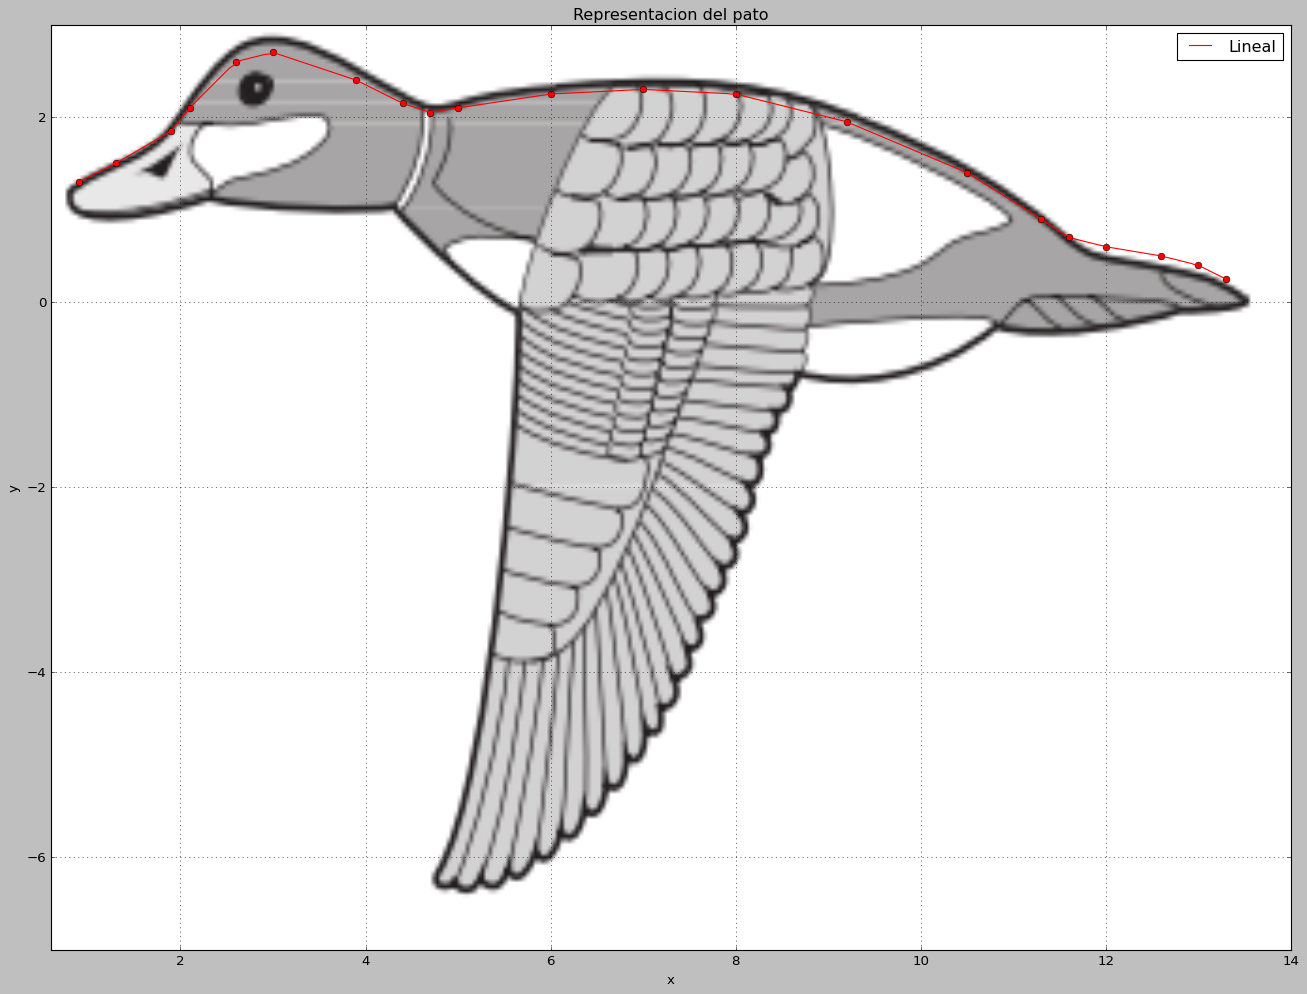

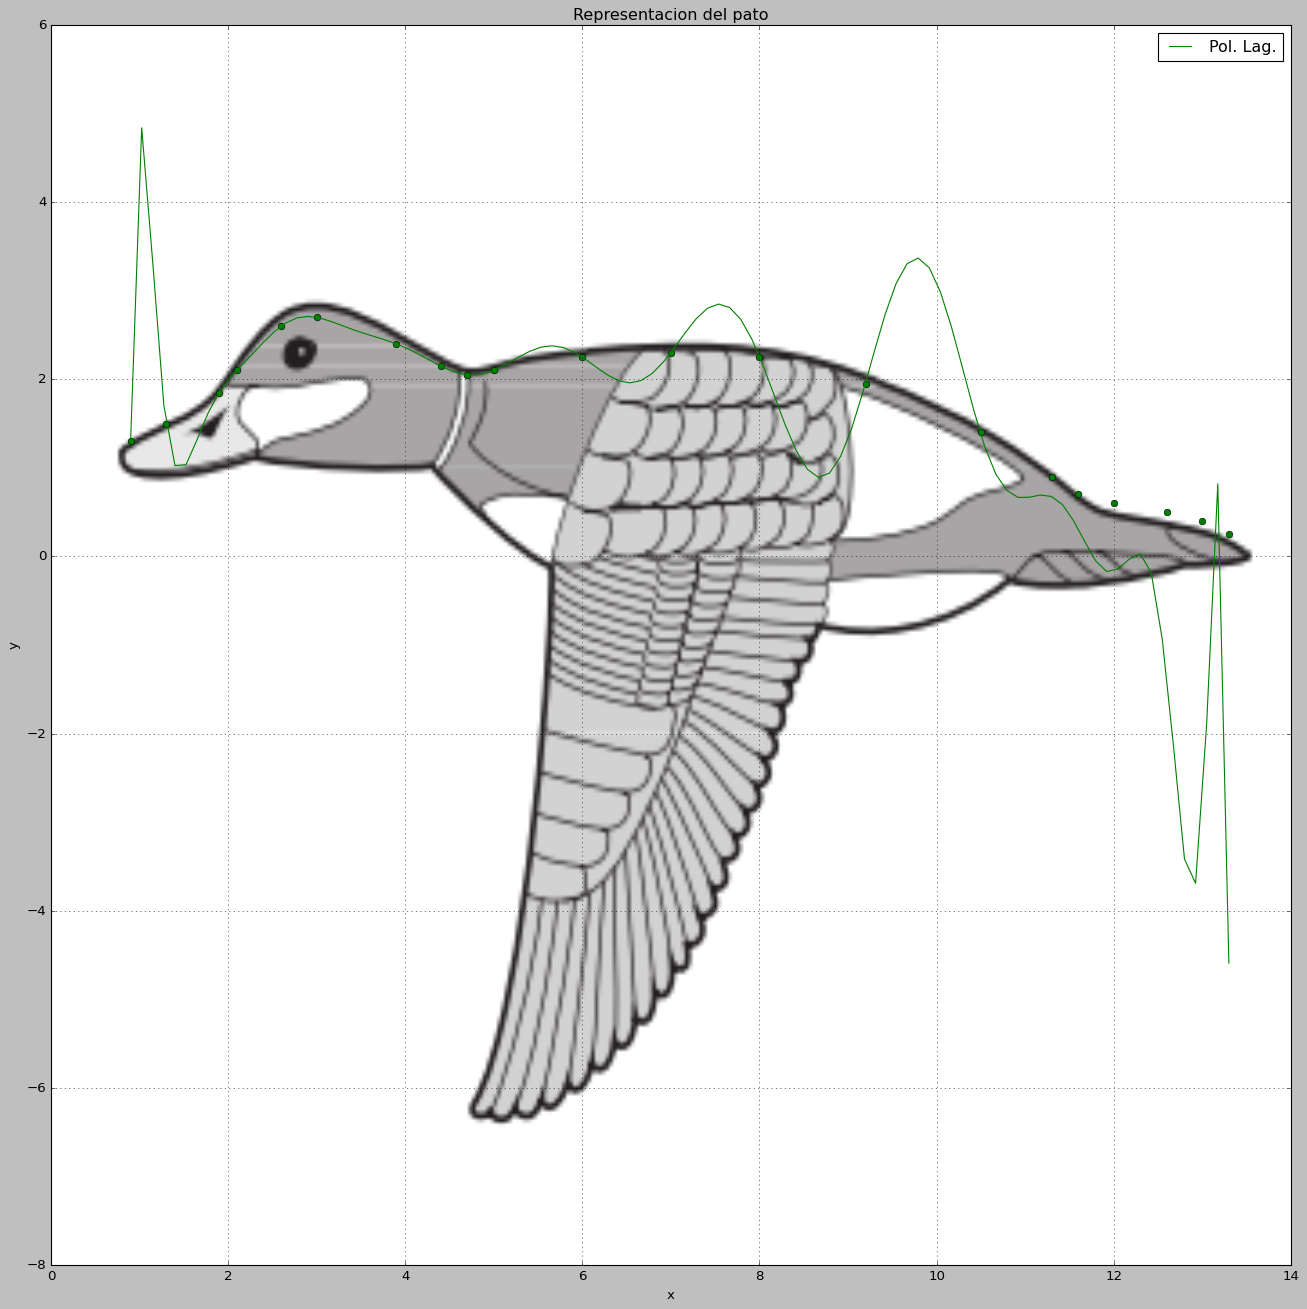

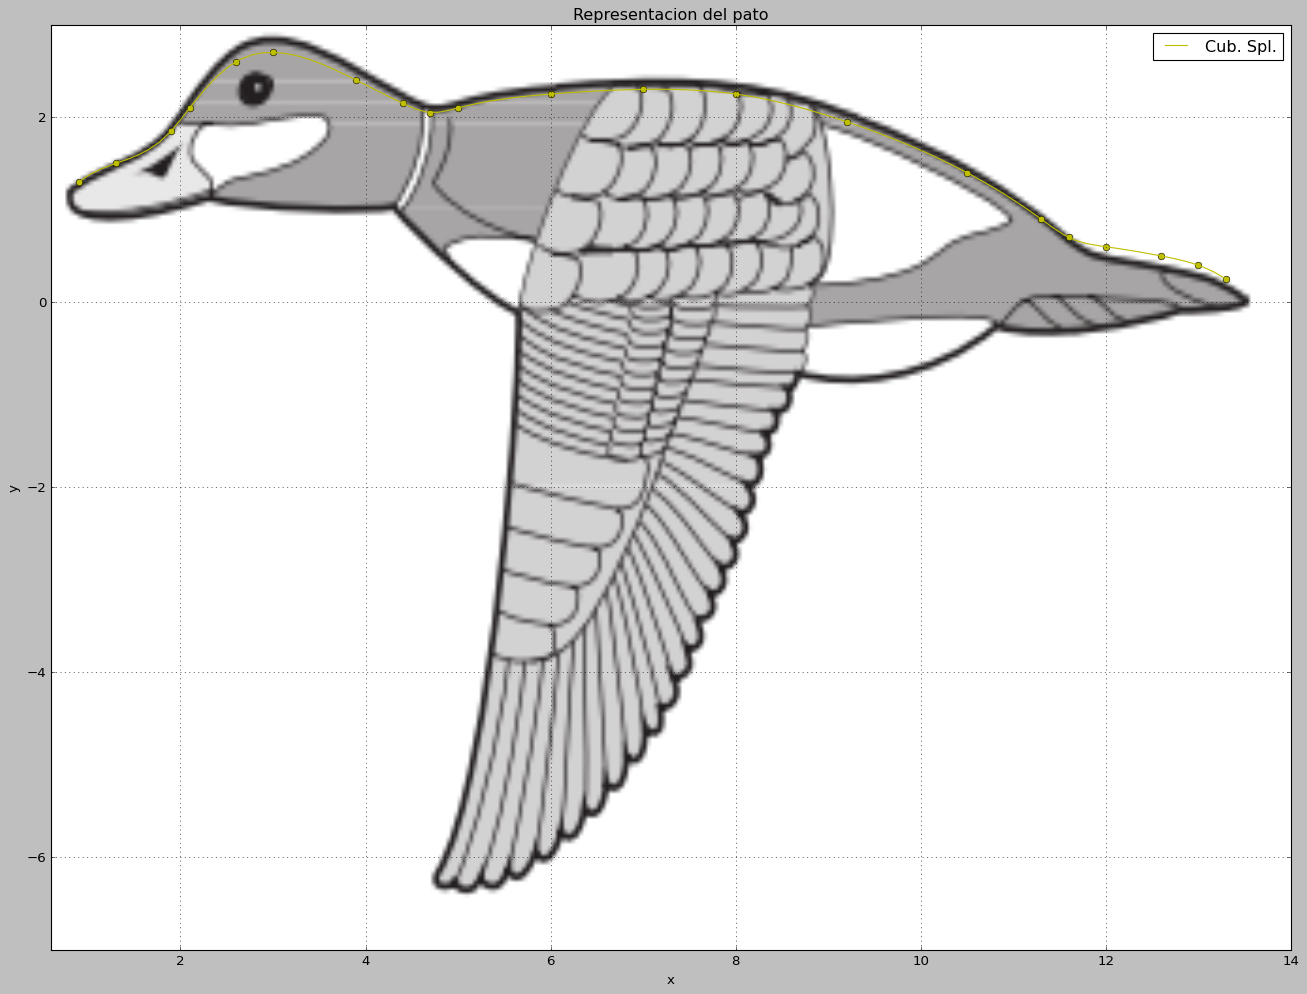

Vemos como el que oscila mas es el polinomio de lagrange y esto se debe a que entre mas puntos tengamos
 peor se pondra este polinomio, ya que tendera a aumentar de grado por lo que la funcion polinomica sera cada
 vez mas inestable, ademas este tambien es muy sensible a la distribucion de sus puntos por lo que se debe que
ser estrategico a la hora de colocarlos o errores de redondeos, si estos estuvieran equidistantes se presentaria
la condicion de Runge pero en nuestro caso se presenta por las razones anteriores


In [289]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Descargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

x = np.linspace(0.9 , 13.3 , 100)

Lineal = interp1d(xp, yp, kind="linear")
PolLag = lagrange(xp , yp)
CubSpl = CubicSpline(xp , yp)

# Representamos graficamente al pato y los puntos que definimos para su contorno superior

plt.figure(figsize=(20, 20))
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, 'or')

plt.xlim(0.6 , 14)
plt.ylim(-7 , 3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.plot( x , Lineal(x) , c="r" ,label="Lineal")

plt.legend()
plt.show()

#----

plt.figure(figsize=(20, 20))
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, 'og')


plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.plot( x , PolLag(x) , c="g", label="Pol. Lag.")

plt.legend()
plt.show()
#---

plt.figure(figsize=(20, 20))
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, 'oy')

plt.xlim(0.6 , 14)
plt.ylim(-7 , 3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.plot( x , CubSpl(x) ,c="y", label="Cub. Spl.")

plt.legend()
plt.show()

print("Vemos como el que oscila mas es el polinomio de lagrange y esto se debe a que entre mas puntos tengamos\n" \
    " peor se pondra este polinomio, ya que tendera a aumentar de grado por lo que la funcion polinomica sera cada\n" \
    " vez mas inestable, ademas este tambien es muy sensible a la distribucion de sus puntos por lo que se debe que\n" \
    "ser estrategico a la hora de colocarlos o errores de redondeos, si estos estuvieran equidistantes se presentaria\n" \
    "la condicion de Runge pero en nuestro caso se presenta por las razones anteriores")

# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

CubicSpline computacionalmente 3.45
CubicSpline con calculos humanos 3.45
Son completamente iguales


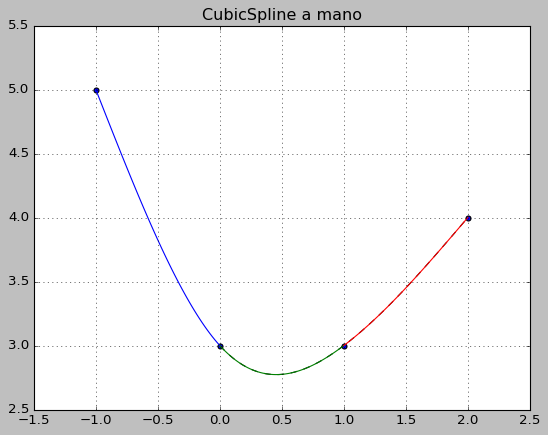

In [286]:
"""
Puntos:
(x0,y0) = (-1,5)
(x1,y1) = ( 0,3)
(x2,y2) = ( 1,3)
(x3,y3) = ( 2,4)

Funciones entre los intervalos:

S0(x) = a0 + b0 * (x+1) + c0 * (x+1)**2 + d0 * (x+1)**3 
S1(x) = a1 + b1 * (x) + c1 * (x)**2 + d1 * (x)**3 
S2(x) = a2 + b2 * (x-1) + c2 * (x-1)**2 + d2 * (x-1)**3 

Derivada de las funciones

S0'(x) = b0 + 2c0 * (x+1) + 3d0 * (x+1)**2
S1'(x) = b1 + 2c1 * (x) + 3d1 * (x)**2
S2'(x) = b2 + 2c2 * (x-1) + 3d2 * (x-1)**2

Segunda Derivada de las funciones

S0''(x) = 2c0 + 6d0 * (x+1)
S1''(x) = 2c1 + 6d1 * (x)
S2''(x) = 2c2 + 6d2 * (x-1)

Condicion #1:

5 = S0(-1) = a0

-------------------------------------->                a0 = 5

3 = S0(0) = a0 + b0 + c0 + d0

-------------------------------------->                b0 + c0 + d0 = -2

3 = S1(0) = a1  

-------------------------------------->                a1 = 3

3 = S1(1) = a1 + b1 + c1 + d1

-------------------------------------->                b1 + c1 + d1 = 0

3 = S2(1) = a2

-------------------------------------->                a2 = 3

4 = S2(2) = a2 + b2 + c2 + d2

-------------------------------------->                b2 + c2 + d2 = 1

Condicion #2:

S0'(0) = S1'(0)
b0 + 2c0 + 3d0 = b1

-------------------------------------->                b0 + 2c0 + 3d0 = b1

S1'(1) = S2'(1)
b1 + 2c1 + 3d1  = b2 

-------------------------------------->                b1 + 2c1 + 3d1 = b2

Condicion #3:
S0''(0) = S1''(0)
2c0 + 6d0 = 2c1

-------------------------------------->                2c0 + 6d0 = 2c1

S1'(1) = S2'(1)
2c1 + 6d1 = 2c2

-------------------------------------->                2c1 + 6d1 = 2c2

Condicion #4:

0 = S0''(-1) = 2c0 

-------------------------------------->                c0 = 0

0 = S2'(2) = 2c2 + 6d2 

-------------------------------------->                2c2 + 6d2 = 0 

Recopilatorio de ecuaciones : 

a0 = 5
a1 = 3
a2 = 3
c0 = 0

b0 + c0 + d0 = -2    -------------> b0 + d0 = -2
b1 + c1 + d1 = 0
b2 + c2 + d2 = 1
2c2 + 6d2 = 0 -------------> c2 + 3d2 = 0

b0 + 2c0 + 3d0 = b1    -------------> b0 + 3d0 - b1 = 0
b1 + 2c1 + 3d1 - b2 = 0
2c0 + 6d0 = 2c1    -------------> 3d0 - c1 = 0
2c1 + 6d1 - 2c2 = 0  -------------> c1 + 3d1 - c2 = 0


( 1  1  0  0  0  0  0  0 )    (b0)    ( -2 )
( 0  0  1  1  1  0  0  0 )    (d0)    ( 0 )
( 0  0  0  0  0  1  1  1 )    (b1)    ( 1 )
( 0  0  0  0  0  0  1  3 ) ** (c1) == ( 0 )
( 1  3 -1  0  0  0  0  0 ) ** (d1) == ( 0 )
( 0  0  1  2  3 -1  0  0 )    (b2)    ( 0 )
( 0  3  0 -1  0  0  0  0 )    (c2)    ( 0 )
( 0  0  0  1  3  0 -1  0 )    (d2)    ( 0 )


"""

A = np.array([
[1,1,0,0,0,0,0,0],
[0,0,1,1,1,0,0,0],
[0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,1,3],
[1,3,-1,0,0,0,0,0],
[0,0,1,2,3,-1,0,0],
[0,3,0,-1,0,0,0,0],
[0,0,0,1,3,0,-1,0],
])

b = np.array([-2,0,1,0,0,0,0,0])

S = solve(A,b)
x = np.array((-1 , 0 , 1, 2))
y = np.array((5 , 3 , 3, 4))

Pol = CubicSpline(x,y , bc_type="natural")

xc = np.linspace(0,2,150)
xs0 = np.linspace(-1,0,50)
xs1 = np.linspace(0,1,50)
xs2 = np.linspace(1,2,50)

s0 = lambda x : 5  + S[0] * (x+1)  +   S[1] * ((x+1)**3)
s1 = lambda x : 3  + S[2] * x      +   S[3] * (x**2)      +  S[4]*(x**3)
s2 = lambda x : 3  + S[5] * (x-1)  +   S[6] * ((x-1)**2)  +  S[7]*((x-1)**3)

plt.title("CubicSpline a mano")
plt.scatter(x,y)
plt.plot(xc , Pol(xc) , c="black" , ls="--")
plt.plot(xs0 , s0(xs0))
plt.plot(xs1 , s1(xs1))
plt.plot(xs2 , s2(xs2))
plt.grid()

print("CubicSpline computacionalmente",Pol(1.5))
print("CubicSpline con calculos humanos",s2(1.5))
print("Son completamente iguales")